# AMAZON SENTIMENT ANALYSIS
Using the Amazon reviews to carry out sentiment analysis and create unigram and bigram wordclouds. 

## BUSINESS OBJECTIVE
* Maximize Profit
* Minimize Churn Rate
* Maximize Service Quality

## CONSTRAINTS
* Cyber Attacks
* Fraudulent Activity

Importing the required libraries. 

In [1]:
import requests
import re
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np

__WEB SCRAPPING__

Creating empty reviews list.

In [2]:
WD_review=[]

Adding the reviews one by one into the empty reviews list. 

In [3]:
for i in range(1,21): #Declaring the number of pages from which reviews are to be considered. 
    ip=[] # Creating an empty list to save reviews of one page at a time. 
    # The url of the review page. 
    url='https://www.amazon.in/Passport-Portable-External-Drive-Compatible/product-reviews/B085P17XND/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    response=requests.get(url) # using the request library to fetch the data from the given url. 
    soup=bs(response.content,'html.parser') #bs4 library parses the information, creating a soup object to iterate over the extracted content.
    reviews=soup.find_all("span",attrs={'class',"a-size-base review-text review-text-content"}) #Extracting content under specific tags
    for i in range(len(reviews)):
        ip.append(reviews[i].text)# appending the reviews one by one into ip list.
        
    WD_review=WD_review + ip #Adding the reviews from each page one by one. 

Joining all the reviews to form a string. 

In [4]:
WD_string=" ".join(WD_review)
WD_string

"\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\xa0☝️A PREVIEW TO PURCHASE :***********************************I like to keep backups of backups of my lifetime collected data & thus have over 15 TB of external harddisks in my arsenal with a dominant share of Western digital disks( both passport & elements ) & few others like Transcend , Samsung SSD & a seagate ( old usb 2.0 ).🔶️ Now , whenever we opt to go for a new external Disk purchase, the following challenges are encountered & if you are planning to invest thousands in purchase - my detailed review, even though a bit lengthy is worth reading.👉 HDDs vs SSDs :**********************While none of the mechanical HDDs can reach the blazing fast speeds of SSDs in excess of 500 MB/s R/W, The HDDs definitely offer a better value for money per MB of storage.Also if data is corrupted in a SSD its almost never retrievable while in a HDD , there is always a hope depending upon extent of damage.🔷️ So for 

Storing all the reviews in a dataframe called df, this dataframe will be used to carry out sentiment analysis. 

In [5]:
df= pd.DataFrame(columns = ["Review"])
df["Review"] = WD_review

__DATA CLEANING__

Converting all the letters in the string to lowercase letters. 

In [6]:
text = WD_string.lower()
text

"\n\n\n\n\n                    the media could not be loaded.\n                \n\n\n\n\xa0☝️a preview to purchase :***********************************i like to keep backups of backups of my lifetime collected data & thus have over 15 tb of external harddisks in my arsenal with a dominant share of western digital disks( both passport & elements ) & few others like transcend , samsung ssd & a seagate ( old usb 2.0 ).🔶️ now , whenever we opt to go for a new external disk purchase, the following challenges are encountered & if you are planning to invest thousands in purchase - my detailed review, even though a bit lengthy is worth reading.👉 hdds vs ssds :**********************while none of the mechanical hdds can reach the blazing fast speeds of ssds in excess of 500 mb/s r/w, the hdds definitely offer a better value for money per mb of storage.also if data is corrupted in a ssd its almost never retrievable while in a hdd , there is always a hope depending upon extent of damage.🔷️ so for 

Remove single quote early since it causes problems with the tokenizer.

In [7]:
text = text.replace("'", "")
text

'\n\n\n\n\n                    the media could not be loaded.\n                \n\n\n\n\xa0☝️a preview to purchase :***********************************i like to keep backups of backups of my lifetime collected data & thus have over 15 tb of external harddisks in my arsenal with a dominant share of western digital disks( both passport & elements ) & few others like transcend , samsung ssd & a seagate ( old usb 2.0 ).🔶️ now , whenever we opt to go for a new external disk purchase, the following challenges are encountered & if you are planning to invest thousands in purchase - my detailed review, even though a bit lengthy is worth reading.👉 hdds vs ssds :**********************while none of the mechanical hdds can reach the blazing fast speeds of ssds in excess of 500 mb/s r/w, the hdds definitely offer a better value for money per mb of storage.also if data is corrupted in a ssd its almost never retrievable while in a hdd , there is always a hope depending upon extent of damage.🔷️ so for 

Tokenizing.

In [8]:
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

Removing extra characters. 

In [9]:
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

In [10]:
text_string=' '.join(text_content)
text_string

'the media could not be loaded  ☝️a preview to purchase                                     i like to keep backups of backups of my lifetime collected data  thus have over 15 tb of external harddisks in my arsenal with a dominant share of western digital disks  both passport  elements   few others like transcend  samsung ssd  a seagate  old usb 20  🔶️ now  whenever we opt to go for a new external disk purchase  the following challenges are encountered  if you are planning to invest thousands in purchase  my detailed review  even though a bit lengthy is worth reading👉 hdds vs ssds                        while none of the mechanical hdds can reach the blazing fast speeds of ssds in excess of 500 mb/s r/w  the hdds definitely offer a better value for money per mb of storagealso if data is corrupted in a ssd its almost never retrievable while in a hdd  there is always a hope depending upon extent of damage🔷️ so for majority bulk backup  hdd are a better option to costlier ssds👉 wd vs seaga

Replacing the nice with good as both mean the same. 

In [11]:
text_string=text_string.replace('nice','good')

Removing the emoji's and extra shapes. 

In [12]:
text_content = re.sub("[^A-Za-z" "]+", " ",text_string).split()

Creating a set of stopwords.

In [13]:
stopwords_wc = set(STOPWORDS)
customised_words = ['tb','nd','hdd','ofc','wd','hard','disk','drive','western','digital','seagate','toshiba','sony','thus','brands','inr','month','lot','ah','ago','r','w','a'] # If you want to remove any particular word form text which does not contribute much in meaning

new_stopwords = stopwords_wc.union(customised_words)

Removing the stop words

In [14]:
text_content = [word for word in text_content if word not in new_stopwords]

Taking  only non-empty entries

In [15]:
text_content = [s for s in text_content if len(s) != 0]

Carrying out lemmatization. 

In [16]:
WNL = nltk.WordNetLemmatizer()
text_content = [WNL.lemmatize(t) for t in text_content]

Again converting it back into strings.

In [17]:
text_string1=' '.join(text_content)
text_string1

'medium loaded preview purchase keep backup backup lifetime collected data external harddisks arsenal dominant share disk passport element others transcend samsung ssd old usb now whenever opt go new external purchase following challenge encountered planning invest thousand purchase detailed review even though bit lengthy worth reading hdds v ssds none mechanical hdds reach blazing fast speed ssds excess mb s hdds definitely offer better value money per mb storagealso data corrupted ssd almost never retrievable always hope depending upon extent damage majority bulk backup better option costlier ssds v topmost struggle making decision now giant reputed american storage preference mostly based upon personal usage experience read somewhere offer better speed better reliability dont feel true speed depend upon type file transferred reliability upon manufacturing process doubt regarding price bit costlier capacity offer warranty yearsi failure friend failure yet got replacement data restore

__Cleaning the reviews in the dataframe__

Converting the reviews into lowercase.

In [18]:
df['Review']=df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Review']

0      the media could not be loaded. ☝️a preview to ...
1      wasn't able to transfer data from windows serv...
2                                       good performance
3      good product, although would like to see how l...
4      this ssd is cheaper than 1tb ssd as price comp...
                             ...                        
185    nice product! using for storing educational vi...
186    useful for storing documents and light weight ...
187    the media could not be loaded. making a very w...
188    lightweight, portable drive, good for media an...
189                                                 good
Name: Review, Length: 190, dtype: object

Removing all extra characters,numbers and emojis.

In [19]:
df['Review']=df['Review'].str.replace('[^a-z" "]+','')
df['Review']

C:\Users\lenny\AppData\Local\Temp\ipykernel_6292\374160037.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review']=df['Review'].str.replace('[^a-z" "]+','')


0      the media could not be loaded a preview to pur...
1      wasnt able to transfer data from windows servi...
2                                       good performance
3      good product although would like to see how lo...
4      this ssd is cheaper than tb ssd as price compa...
                             ...                        
185    nice product using for storing educational vid...
186    useful for storing documents and light weight ...
187    the media could not be loaded making a very we...
188    lightweight portable drive good for media and ...
189                                                 good
Name: Review, Length: 190, dtype: object

Replacing similar meaning words with good.

In [20]:
df['Review']=df['Review'].str.replace('nice','good')
df['Review']=df['Review'].str.replace('best','good')
df['Review']=df['Review'].str.replace('great','good')


Removing all the stopwords from the reviews.

In [21]:
df['Review']=df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in new_stopwords))
df['Review']

0      media loaded preview purchase keep backups bac...
1      wasnt able transfer data windows service pack ...
2                                       good performance
3      good product although see long works without i...
4          ssd cheaper ssd price comparison worth buying
                             ...                        
185    good product using storing educational videos ...
186    useful storing documents light weight carry ar...
187    media loaded making weird sound periodicallyqu...
188    lightweight portable good media doc storage go...
189                                                 good
Name: Review, Length: 190, dtype: object

### UNIGRAM WORDCLOUD

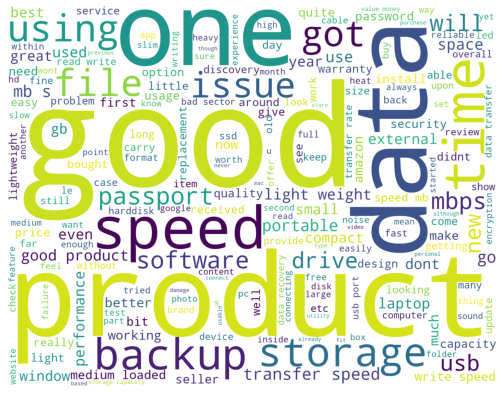

In [22]:
wordcloud_ip = WordCloud(background_color='White',
                      width=1800,
                      height=1400
                     ).generate(text_string1)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

### BIGRAM WORDCLOUD

Creating a list of bigrams using nltk library. 

In [23]:
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)

[('medium', 'loaded'), ('loaded', 'preview'), ('preview', 'purchase'), ('purchase', 'keep'), ('keep', 'backup'), ('backup', 'backup'), ('backup', 'lifetime'), ('lifetime', 'collected'), ('collected', 'data'), ('data', 'external'), ('external', 'harddisks'), ('harddisks', 'arsenal'), ('arsenal', 'dominant'), ('dominant', 'share'), ('share', 'disk'), ('disk', 'passport'), ('passport', 'element'), ('element', 'others'), ('others', 'transcend'), ('transcend', 'samsung'), ('samsung', 'ssd'), ('ssd', 'old'), ('old', 'usb'), ('usb', 'now'), ('now', 'whenever'), ('whenever', 'opt'), ('opt', 'go'), ('go', 'new'), ('new', 'external'), ('external', 'purchase'), ('purchase', 'following'), ('following', 'challenge'), ('challenge', 'encountered'), ('encountered', 'planning'), ('planning', 'invest'), ('invest', 'thousand'), ('thousand', 'purchase'), ('purchase', 'detailed'), ('detailed', 'review'), ('review', 'even'), ('even', 'though'), ('though', 'bit'), ('bit', 'lengthy'), ('lengthy', 'worth'), ('

Saving it into a dictionary to use it to create a wordcloud. 

In [24]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

['medium loaded', 'loaded preview', 'preview purchase', 'purchase keep', 'keep backup', 'backup backup', 'backup lifetime', 'lifetime collected', 'collected data', 'data external', 'external harddisks', 'harddisks arsenal', 'arsenal dominant', 'dominant share', 'share disk', 'disk passport', 'passport element', 'element others', 'others transcend', 'transcend samsung', 'samsung ssd', 'ssd old', 'old usb', 'usb now', 'now whenever', 'whenever opt', 'opt go', 'go new', 'new external', 'external purchase', 'purchase following', 'following challenge', 'challenge encountered', 'encountered planning', 'planning invest', 'invest thousand', 'thousand purchase', 'purchase detailed', 'detailed review', 'review even', 'even though', 'though bit', 'bit lengthy', 'lengthy worth', 'worth reading', 'reading hdds', 'hdds v', 'v ssds', 'ssds none', 'none mechanical', 'mechanical hdds', 'hdds reach', 'reach blazing', 'blazing fast', 'fast speed', 'speed ssds', 'ssds excess', 'excess mb', 'mb s', 's hdds

Using Tfidf vectoriser to view the frequency of bigrams. 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

{'medium loaded': 2227,
 'loaded preview': 2039,
 'preview purchase': 2812,
 'purchase keep': 2946,
 'keep backup': 1902,
 'backup backup': 202,
 'backup lifetime': 218,
 'lifetime collected': 1990,
 'collected data': 508,
 'data external': 717,
 'external harddisks': 1167,
 'harddisks arsenal': 1656,
 'arsenal dominant': 149,
 'dominant share': 910,
 'share disk': 3357,
 'disk passport': 895,
 'passport element': 2600,
 'element others': 1038,
 'others transcend': 2548,
 'transcend samsung': 3904,
 'samsung ssd': 3216,
 'ssd old': 3607,
 'old usb': 2462,
 'usb now': 4029,
 'now whenever': 2423,
 'whenever opt': 4235,
 'opt go': 2527,
 'go new': 1468,
 'new external': 2355,
 'external purchase': 1171,
 'purchase following': 2943,
 'following challenge': 1337,
 'challenge encountered': 463,
 'encountered planning': 1049,
 'planning invest': 2719,
 'invest thousand': 1850,
 'thousand purchase': 3827,
 'purchase detailed': 2942,
 'detailed review': 830,
 'review even': 3175,
 'even though

Creating a dictionary of word frequency. 

In [26]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])

[('transfer speed', 22.0), ('light weight', 18.0), ('good product', 18.0), ('medium loaded', 13.0), ('write speed', 13.0), ('speed mb', 11.0), ('read write', 9.0), ('transfer rate', 8.0), ('data transfer', 8.0), ('bad sector', 7.0), ('data recovery', 7.0), ('usb port', 7.0), ('speed good', 7.0), ('value money', 6.0), ('product good', 6.0), ('good storage', 6.0), ('storage capacity', 6.0), ('even though', 5.0), ('around mb', 5.0), ('year warranty', 5.0), ('good looking', 5.0), ('portable good', 5.0), ('speed mbps', 5.0), ('hardware encryption', 5.0), ('new edition', 4.0), ('password protection', 4.0), ('dont know', 4.0), ('stopped working', 4.0), ('good speed', 4.0), ('good good', 4.0), ('till now', 4.0), ('new one', 4.0), ('delivery guy', 4.0), ('keep backup', 3.0), ('good enough', 3.0), ('read speed', 3.0), ('speed around', 3.0), ('around mbps', 3.0), ('good performance', 3.0), ('performance good', 3.0), ('see long', 3.0), ('discovery software', 3.0), ('social medium', 3.0), ('set pas

Generating wordcloud

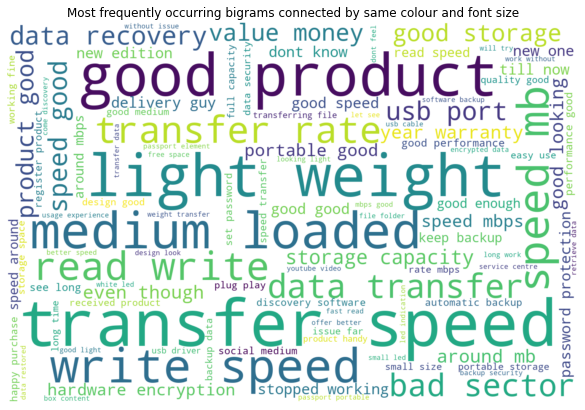

In [27]:
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(background_color='White',max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords)

wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(15,7))
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## SENTIMENT ANALYSIS

Using the vader Sentiment library to do sentiment analysis of each reviews, which will give an idea about the positive or negative reception of the movie among the reviewers.

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Saving the reviews as list with in a list.

In [29]:
list_reviews=[]
for text in df['Review']:
    text=[text]
    list_reviews.append(text)
list_reviews

[['media loaded preview purchase keep backups backups lifetime collected data external harddisks arsenal dominant share disks passport elements others transcend samsung ssd old usb now whenever opt go new external purchase following challenges encountered planning invest thousands purchase detailed review even though bit lengthy worth reading hdds vs ssds none mechanical hdds reach blazing fast speeds ssds excess mbs rw hdds definitely offer better value money per mb storagealso data corrupted ssd almost never retrievable always hope depending upon extent damage majority bulk backup better option costlier ssds vs topmost struggle making decisionnow giant reputed american storage preference mostly based upon personal usage experiencesi read somewhere offers better speeds better reliability dont feel true speeds depend upon type files transferred reliability upon manufacturing processes doubt regarding price bit costlier capacity offer warranties yearsi failure friend failure yet got rep

Using an empty list to store the polarity scores of each review, the final output will be a list of dictionaries.

In [30]:
empty=[]
for e in range(0,len(df.Review)):   
    v=list_reviews[e]
    for sentence in v:
        ss = sid.polarity_scores(sentence) 
        empty.append(ss)
print(empty)

[{'neg': 0.089, 'neu': 0.748, 'pos': 0.163, 'compound': 0.977}, {'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'compound': 0.4404}, {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}, {'neg': 0.131, 'neu': 0.71, 'pos': 0.158, 'compound': 0.1265}, {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.2263}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.032, 'neu': 0.777, 'pos': 0.191, 'compound': 0.9935}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}, {'neg': 0.064, 'neu': 0.699, 'pos': 0.237, 'compound': 0.936}, {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.6124}, {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}, {'neg': 0.105, 'neu': 0.771, 'pos': 0.123, 'compound': 0.4639}, {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}, {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}, {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.34}, {'neg': 0.061, 'neu': 0.759, 'pos': 0.18, 'compound': 0.9648}, {'neg': 0.0,

Storing the polarity scores in a dataframe.

In [31]:
df_sentiment=pd.DataFrame.from_dict(empty,orient='columns')
df_sentiment.head(5)

,neg,neu,pos,compound
0,0.089,0.748,0.163,0.9770
1,0.000,0.906,0.094,0.4404
2,0.000,0.256,0.744,0.4404
3,0.131,0.710,0.158,0.1265
4,0.000,0.759,0.241,0.2263


Concatenating both df and df_sentiment to get the reviews and its polarity scores in a single dataframe.

In [32]:
df_c=pd.concat([df['Review'],df_sentiment],axis=1)
df_c.head(5)

,Review,neg,neu,pos,compound
0,media loaded preview purchase keep backups bac...,0.089,0.748,0.163,0.9770
1,wasnt able transfer data windows service pack ...,0.000,0.906,0.094,0.4404
2,good performance,0.000,0.256,0.744,0.4404
3,good product although see long works without i...,0.131,0.710,0.158,0.1265
4,ssd cheaper ssd price comparison worth buying,0.000,0.759,0.241,0.2263


Converting the polarity scores into a positive or negative sentiment using the compound values. So if the compound value is zero or greater then the review is positive but if its less than zero its negative.

In [33]:

df_c['sentiment']=np.where(df_c['compound']>=0,'Positive','Negative')
df_c.head(5)

,Review,neg,neu,pos,compound,sentiment
0,media loaded preview purchase keep backups bac...,0.089,0.748,0.163,0.9770,Positive
1,wasnt able transfer data windows service pack ...,0.000,0.906,0.094,0.4404,Positive
2,good performance,0.000,0.256,0.744,0.4404,Positive
3,good product although see long works without i...,0.131,0.710,0.158,0.1265,Positive
4,ssd cheaper ssd price comparison worth buying,0.000,0.759,0.241,0.2263,Positive


Creating a bar chart to understand the sentiments of the reviewers.

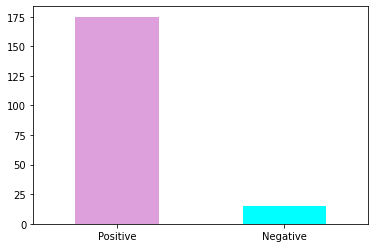

In [34]:
result=df_c['sentiment'].value_counts()
result.plot(kind='bar',rot=0,color=['plum','cyan']);

### CONCLUSION
From the sentiment analysis it is very clear that this product was well recieved by users , so this gives the manufacturers and distributors of such products to be aware of sentiments of the consumers regarding their products so they can decide future products or improve on the existing product.